<a href="https://colab.research.google.com/github/Almamun001/Mental-Health-Revised/blob/main/MentalBERT_BiLSTM_CNN_(Revised).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Install tf-keras for compatibility with transformers
# !pip install -q tf-keras

In [ ]:
# # Install necessary libraries
# !pip install -q tensorflow==2.15.0 tensorflow-text==2.15.0
# !pip install -q transformers imbalanced-learn textblob vaderSentiment pyphen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source 

In [1]:
!pip install -q vaderSentiment pyphen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.2 MB/s eta 0:00:00


In [2]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import os
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Bidirectional, LSTM, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# NLP and sentiment analysis
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pyphen
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download(['punkt', 'stopwords', 'averaged_perceptron_tagger'])

# Transformers
from transformers import AutoTokenizer, TFAutoModel
from huggingface_hub import login

from google.colab import userdata

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [3]:
# Google Colab setup
from google.colab import drive, userdata
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.environ['TF_USE_LEGACY_KERAS'] = '1'

# Set consistent style for plots
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [5]:
# Load dataset
file_path = "/content/drive/MyDrive/Thesis Work/Main Datasets/Combined_Data.csv"
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")

Dataset loaded successfully!


In [6]:
# Data cleaning
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)
df.dropna(subset=['statement'], inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
# Display basic info
df.info()

# Display descriptive statistics
df.describe(include='all')

# Display the first few rows
df.head()

# Check the value counts of the target variable
print("\nValue counts for the target variable:")
print(df['status'].value_counts())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 51093 entries, 0 to 52840
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  51093 non-null  object
 1   status     51093 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB

Value counts for the target variable:
status
Normal                  16040
Depression              15094
Suicidal                10644
Anxiety                  3623
Bipolar                  2501
Stress                   2296
Personality disorder      895
Name: count, dtype: int64

Missing values per column:
statement    0
status       0
dtype: int64


In [8]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s.,!?\'\"]', '', text)  # Keep basic punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text.lower()

df['statement'] = df['statement'].astype(str).apply(clean_text)

In [9]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pyphen

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

# Initialize tools
analyzer = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))
dic = pyphen.Pyphen(lang='en')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [10]:
# ====================
# IMPROVEMENT 1: Enhanced Feature Engineering (without POS tagging)
# ====================
print("\nPerforming enhanced feature engineering...")

# Initialize tools
analyzer = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))
dic = pyphen.Pyphen(lang='en')

# Basic text features
df['statement_length'] = df['statement'].apply(len)
df['num_words'] = df['statement'].apply(lambda x: len(word_tokenize(x)))
df['avg_word_length'] = df.apply(lambda r: r['statement_length']/r['num_words'] if r['num_words'] > 0 else 0, axis=1)
df['stopword_ratio'] = df['statement'].apply(
    lambda x: len([w for w in word_tokenize(x) if w.lower() in stop_words]) / max(len(word_tokenize(x)), 1))
df['unique_word_ratio'] = df['statement'].apply(
    lambda x: len(set(word_tokenize(x))) / max(len(word_tokenize(x)), 1))

# Sentiment features
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

def get_vader_sentiment(text):
    vs = analyzer.polarity_scores(text)
    return vs['neg'], vs['neu'], vs['pos'], vs['compound']

df[['tb_polarity', 'tb_subjectivity']] = df['statement'].apply(
    lambda x: pd.Series(get_textblob_sentiment(x)))
df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']] = df['statement'].apply(
    lambda x: pd.Series(get_vader_sentiment(x)))

# Readability and complexity features
def calculate_readability(text):
    words = word_tokenize(text)
    sentences = nltk.sent_tokenize(text)
    syllables = sum([len(dic.inserted(word).split('-')) for word in words])

    num_words = len(words)
    num_sentences = len(sentences)

    if num_words == 0 or num_sentences == 0:
        return 0, 0

    # Flesch Reading Ease
    flesch = 206.835 - 1.015*(num_words/num_sentences) - 84.6*(syllables/num_words)
    # Automated Readability Index
    ari = 4.71*(len(text)/num_words) + 0.5*(num_words/num_sentences) - 21.43
    return flesch, ari

df[['flesch', 'ari']] = df['statement'].apply(
    lambda x: pd.Series(calculate_readability(x)))

# TF-IDF based features (dimensionality reduced)
print("Adding TF-IDF based features...")
tfidf = TfidfVectorizer(max_features=500, stop_words='english', ngram_range=(1, 2))
tfidf_matrix = tfidf.fit_transform(df['statement'])
svd = TruncatedSVD(n_components=20, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_matrix)

for i in range(20):
    df[f'tfidf_svd_{i}'] = tfidf_reduced[:, i]

# Feature list (without POS features)
engineered_features = [
    'statement_length', 'num_words', 'avg_word_length', 'stopword_ratio',
    'unique_word_ratio', 'tb_polarity', 'tb_subjectivity', 'vader_neg',
    'vader_neu', 'vader_pos', 'vader_compound', 'flesch', 'ari'
] + [f'tfidf_svd_{i}' for i in range(20)]

print(f"Total engineered features: {len(engineered_features)}")


Performing enhanced feature engineering...
Adding TF-IDF based features...
Total engineered features: 33


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
import seaborn as sns
import matplotlib.pyplot as plt

# ====================
# Enhanced Feature Selection
# ====================
print("\nPerforming comprehensive feature selection...")

# Encode the target variable
label_encoder = LabelEncoder()
df['status_encoded'] = label_encoder.fit_transform(df['status'])

# 1. ANOVA F-values
f_values, p_values = f_classif(df[engineered_features], df['status_encoded'])
anova_df = pd.DataFrame({
    'feature': engineered_features,
    'f_value': f_values,
    'p_value': p_values
}).sort_values('f_value', ascending=False)

print("\nTop 15 features by ANOVA F-value:")
display(anova_df.head(15))



Performing comprehensive feature selection...

Top 15 features by ANOVA F-value:


,feature,f_value,p_value
4,unique_word_ratio,7168.737056,0.0
13,tfidf_svd_0,6121.573813,0.0
3,stopword_ratio,1976.489260,0.0
14,tfidf_svd_1,1648.440885,0.0
17,tfidf_svd_4,1597.434731,0.0
1,num_words,1583.842116,0.0
0,statement_length,1576.700869,0.0
7,vader_neg,1175.381417,0.0
10,vader_compound,1021.429809,0.0
6,tb_subjectivity,903.753032,0.0


In [12]:
# 2. Correlation with target
corr_with_target = df[engineered_features + ['status_encoded']].corr()['status_encoded'].abs().sort_values(ascending=False)
corr_with_target = corr_with_target.drop('status_encoded')
top_corr_features = corr_with_target.index[:15].tolist()

print("\nTop 15 features by correlation with status:")
print(top_corr_features)


Top 15 features by correlation with status:
['tfidf_svd_1', 'tfidf_svd_4', 'tfidf_svd_6', 'stopword_ratio', 'tfidf_svd_3', 'tfidf_svd_5', 'tfidf_svd_10', 'flesch', 'tfidf_svd_2', 'tfidf_svd_7', 'vader_compound', 'tfidf_svd_9', 'tfidf_svd_13', 'vader_neg', 'vader_neu']


In [13]:
# 3. Mutual information
from sklearn.feature_selection import mutual_info_classif # Import the function

mi_scores = mutual_info_classif(df[engineered_features], df['status_encoded'], random_state=42)
mi_df = pd.DataFrame({'feature': engineered_features, 'mi_score': mi_scores})
mi_df = mi_df.sort_values('mi_score', ascending=False)
top_mi_features = mi_df['feature'].head(15).tolist()

print("\nTop 15 features by mutual information:")
print(top_mi_features)


Top 15 features by mutual information:
['statement_length', 'num_words', 'tfidf_svd_0', 'stopword_ratio', 'flesch', 'unique_word_ratio', 'tfidf_svd_1', 'ari', 'vader_compound', 'tfidf_svd_4', 'avg_word_length', 'vader_neg', 'tfidf_svd_3', 'tb_polarity', 'tb_subjectivity']


In [14]:
# Combine all methods
selected_features = list(set(
    anova_df['feature'].head(15).tolist() +
    top_corr_features +
    top_mi_features
))
print(f"\nSelected {len(selected_features)} features based on three methods:")
print(selected_features)


Selected 24 features based on three methods:
['tfidf_svd_0', 'tb_polarity', 'unique_word_ratio', 'num_words', 'avg_word_length', 'tfidf_svd_9', 'tfidf_svd_3', 'vader_neg', 'tfidf_svd_1', 'tfidf_svd_7', 'tfidf_svd_10', 'tb_subjectivity', 'tfidf_svd_4', 'stopword_ratio', 'tfidf_svd_5', 'tfidf_svd_16', 'vader_compound', 'flesch', 'tfidf_svd_13', 'statement_length', 'tfidf_svd_2', 'ari', 'tfidf_svd_6', 'vader_neu']


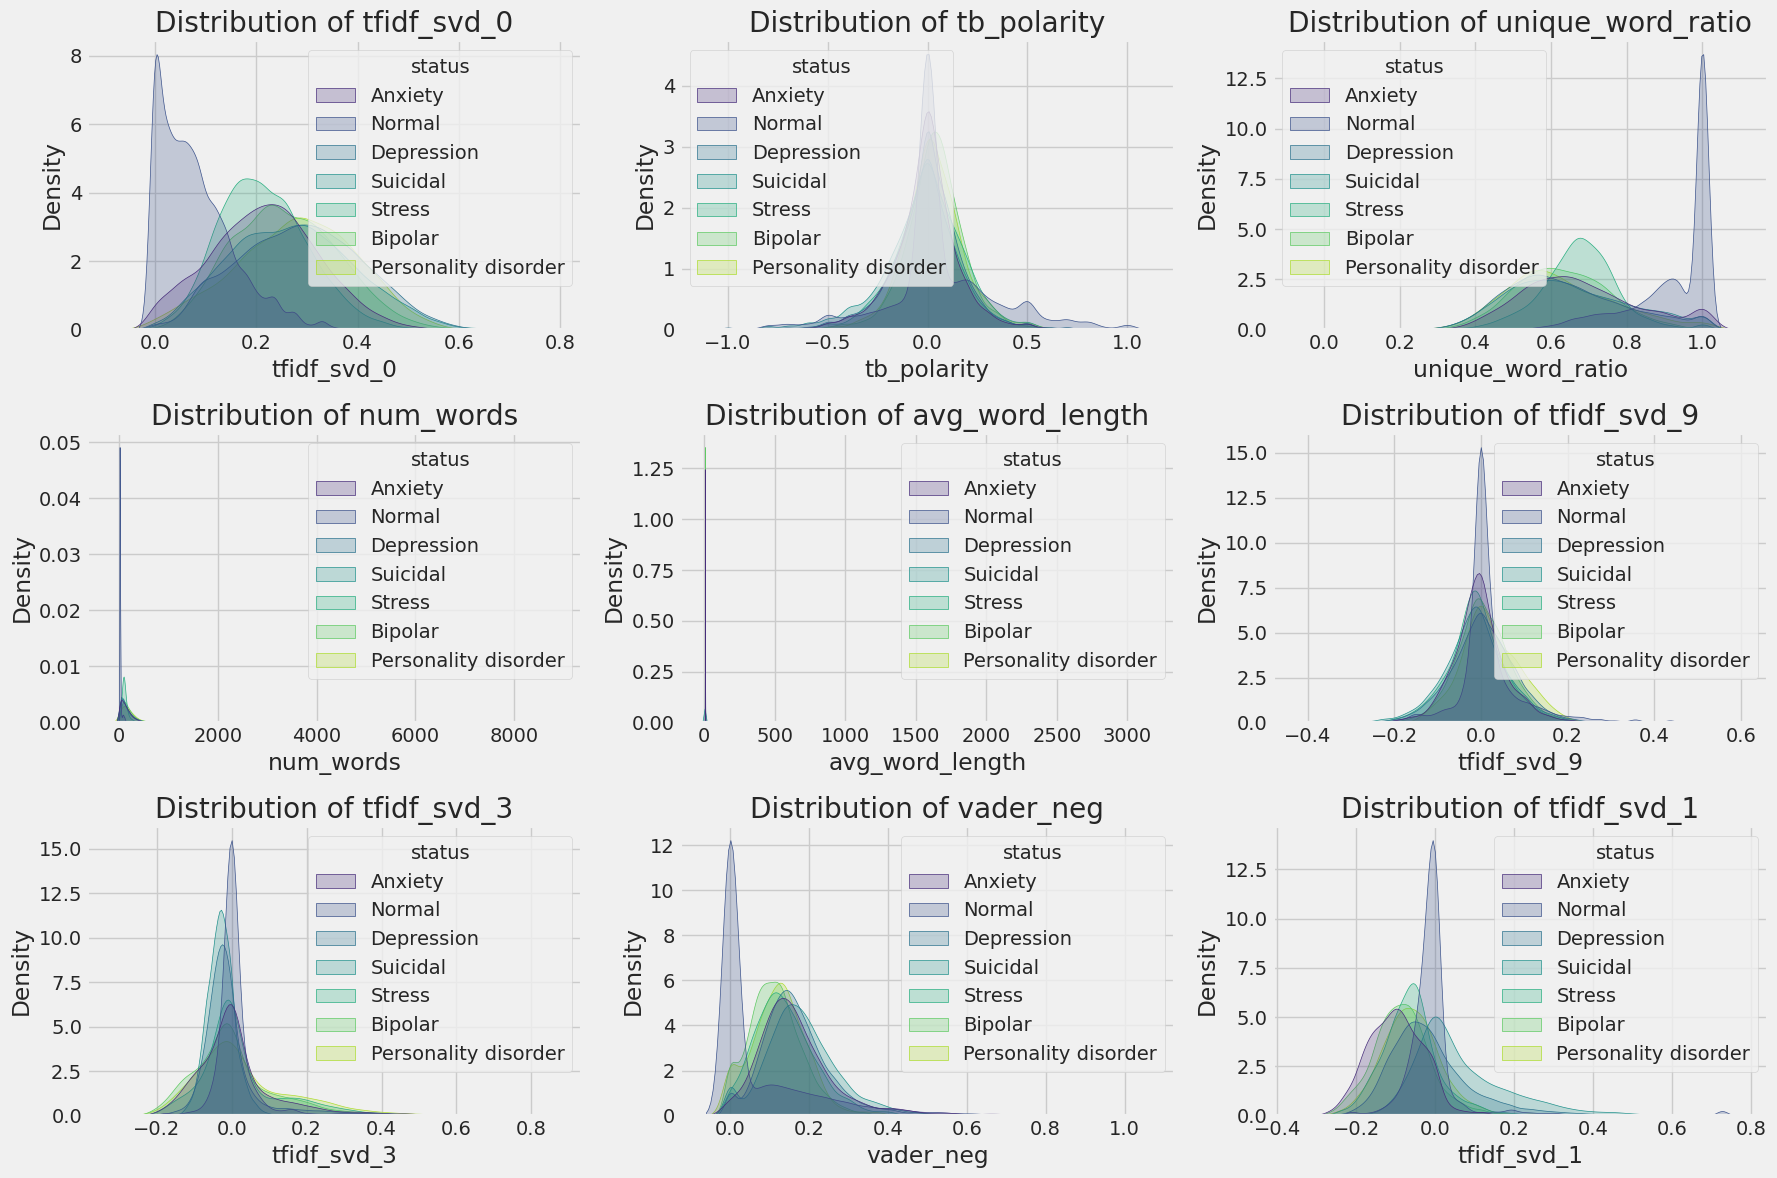

In [15]:
# Visualize distributions
plt.figure(figsize=(18, 12))
for i, feature in enumerate(selected_features[:9], 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df, x=feature, hue='status', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


Generating feature correlation heatmap...


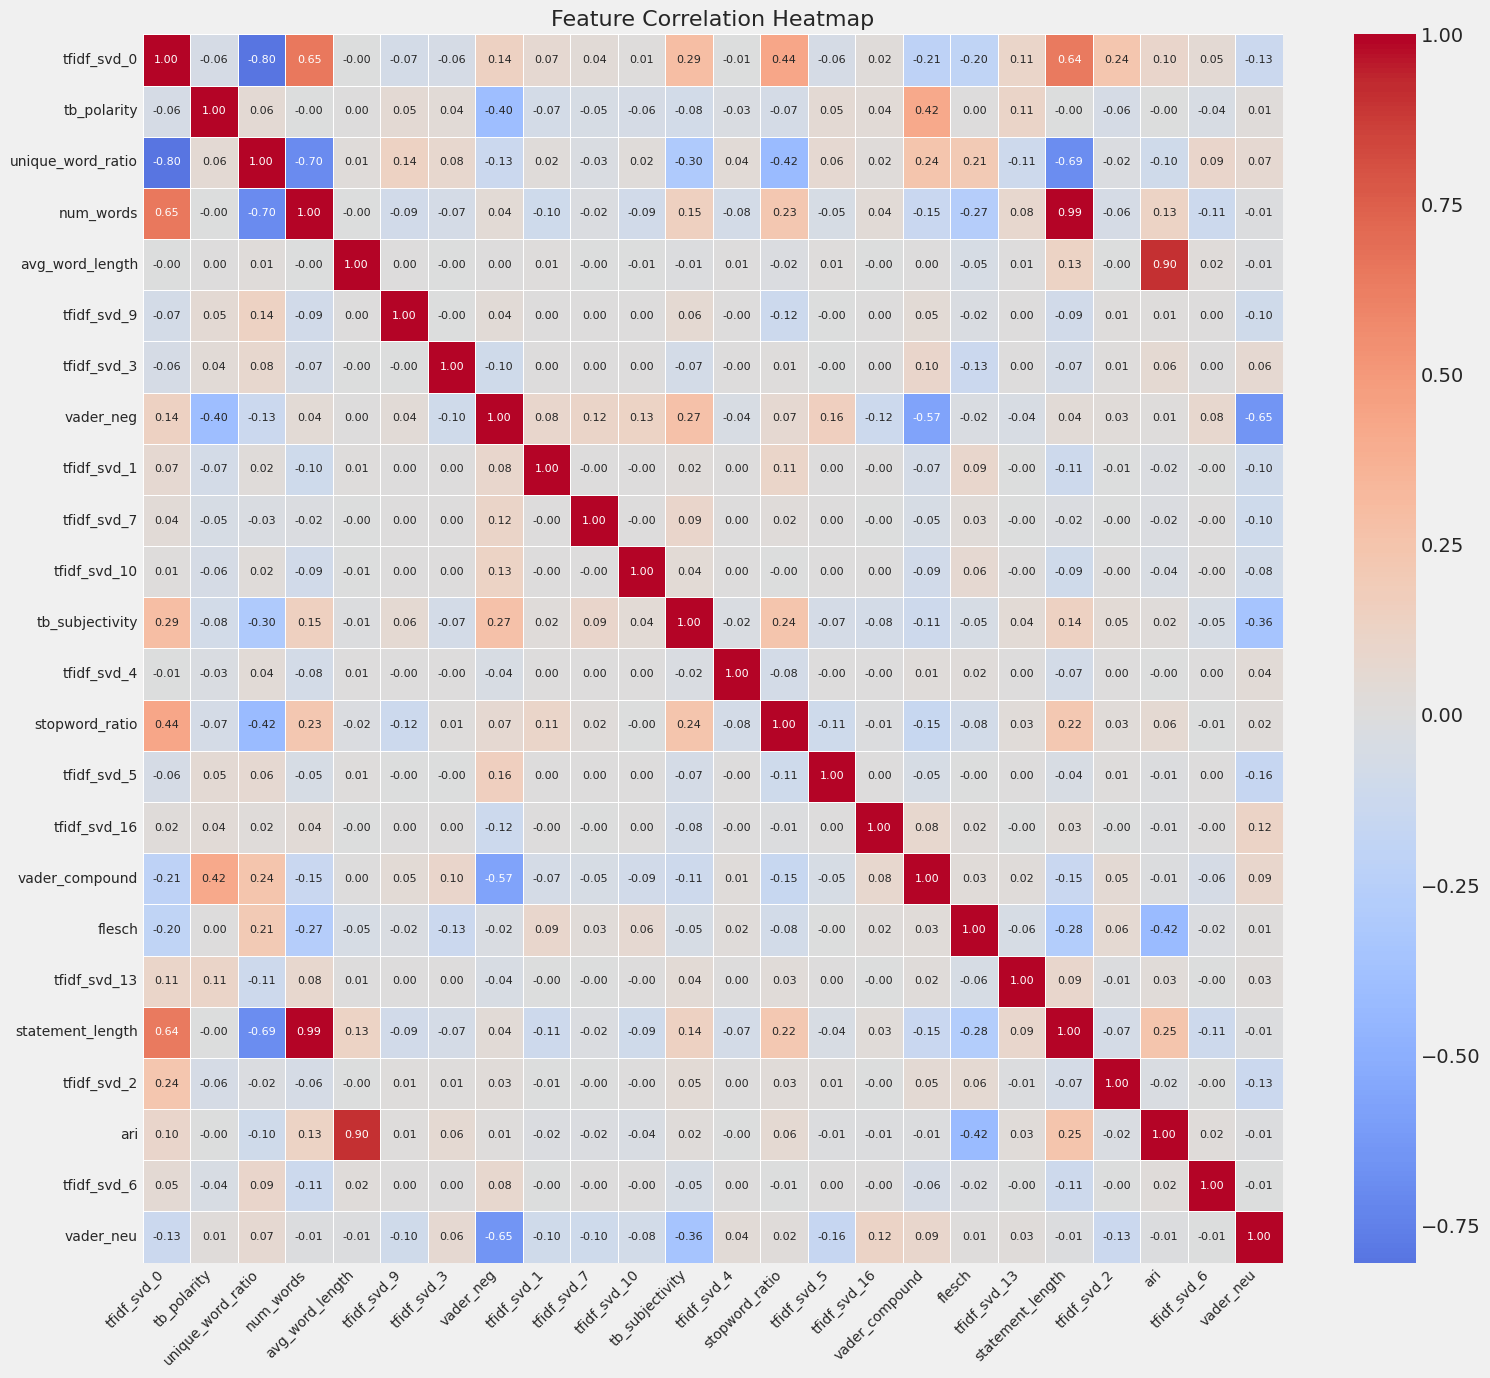

In [16]:
# ====================
# Feature Correlation Heatmap
# ====================
print("\nGenerating feature correlation heatmap...")

# Calculate correlation matrix for selected features
corr_matrix = df[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=.5,
    annot_kws={"size": 8}
)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Remove temporary column
df.drop('status_encoded', axis=1, inplace=True)

In [17]:
# ====================
# IMPROVEMENT 2: One-Hot Encoding
# ====================
print("\nApplying one-hot encoding to labels...")
ohe = OneHotEncoder(sparse_output=False)
one_hot_labels = ohe.fit_transform(df[['status']])
class_names = ohe.categories_[0]


Applying one-hot encoding to labels...


In [18]:
# ====================
# IMPROVEMENT 3: Class Balancing - Select 7000 per class
# ====================
print("\nBalancing classes...")
max_per_class = 7000
balanced_list = []

for status in class_names:
    class_subset = df[df['status'] == status]
    if len(class_subset) > max_per_class:
        class_sample = class_subset.sample(n=max_per_class, random_state=42)
    else:
        class_sample = class_subset
    balanced_list.append(class_sample)

df_balanced = pd.concat(balanced_list)
print(f"Shape after initial balancing: {df_balanced.shape}")


Balancing classes...
Shape after initial balancing: (30315, 35)


In [19]:
# ====================
# IMPROVEMENT 4: Apply SMOTE for under-represented classes (Fixed)
# ====================
print("\nApplying SMOTE for under-represented classes...")

# Prepare data for SMOTE - preserve original indices
df_balanced['index'] = df_balanced.index
X_features = df_balanced[selected_features].values
y_labels = df_balanced['status'].values

# Apply SMOTE only to under-represented classes
smote = SMOTE(sampling_strategy={cls: max_per_class for cls in class_names
                                 if df_balanced[df_balanced['status'] == cls].shape[0] < max_per_class},
              random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_features, y_labels)
print(f"Shape after SMOTE: {X_resampled.shape}")

# Create balanced feature DataFrame
df_balanced_final = pd.DataFrame(X_resampled, columns=selected_features)
df_balanced_final['status'] = y_resampled


Applying SMOTE for under-represented classes...
Shape after SMOTE: (49000, 24)


In [20]:
# ====================
# FEATURE SCALING (ADD HERE)
# ====================
print("\nScaling engineered features...")
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the engineered features
df_balanced_final[selected_features] = scaler.fit_transform(df_balanced_final[selected_features])


Scaling engineered features...


In [21]:
df_balanced_final

,tfidf_svd_0,tb_polarity,unique_word_ratio,num_words,avg_word_length,tfidf_svd_9,tfidf_svd_3,vader_neg,tfidf_svd_1,tfidf_svd_7,...,tfidf_svd_16,vader_compound,flesch,tfidf_svd_13,statement_length,tfidf_svd_2,ari,tfidf_svd_6,vader_neu,status
0,-1.766315,-0.050003,1.837881,-0.807315,-0.098978,0.246562,-0.047251,-1.371568,0.319962,-0.045952,...,-0.326378,0.335484,0.771551,-0.559507,-0.810781,0.106043,-0.242989,0.080404,2.066012,Anxiety
1,-1.531078,-1.583217,1.383287,-0.751943,0.011821,-0.070054,-0.098164,2.624584,0.042694,-0.444644,...,-0.981472,-0.009692,0.328276,-0.056950,-0.746937,-0.046892,-0.112288,-0.030237,-3.359758,Anxiety
2,-1.440139,-1.327682,1.142619,-0.729794,-0.011516,-0.159680,-0.122219,3.092426,0.244084,-0.038154,...,0.077874,-0.785764,0.377523,-0.052327,-0.730385,0.059782,-0.120453,-0.194697,-2.744893,Anxiety
3,-1.412503,-0.050003,1.383287,-0.751943,-0.004263,0.553575,1.188989,0.762962,-0.494531,-1.516415,...,-1.721930,-0.307430,0.076529,1.553862,-0.750484,-0.597375,-0.081683,0.165195,0.246343,Anxiety
4,-1.570075,-1.647101,1.246908,-0.713182,-0.080392,-0.118627,-0.043111,1.152830,0.146531,-0.216406,...,0.096151,-0.417862,0.472552,0.025725,-0.737479,-0.012893,-0.175698,-0.028968,-0.086016,Anxiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,-0.406472,-0.306001,-0.090199,-0.409562,-0.030164,-0.427283,-0.154622,0.050317,1.392044,-0.636464,...,0.267936,0.227172,0.407877,-0.568138,-0.440460,-0.366034,-0.092538,-0.343789,-0.401122,Stress
48996,-0.528487,0.778849,0.175703,-0.572658,-0.035800,0.800069,-0.545553,-0.674303,-0.423189,-0.415611,...,-0.872074,1.236137,0.509820,-1.675890,-0.595156,0.115833,-0.139600,-0.438893,0.262961,Stress
48997,-0.393330,0.129116,-0.152956,-0.278025,-0.004519,-0.727051,-0.612235,-0.679702,0.122972,-0.317020,...,0.641669,0.911818,0.102856,-0.115003,-0.276139,-0.046645,-0.034407,1.498347,0.666426,Stress
48998,2.230704,-0.084571,-1.110883,1.725950,0.004645,0.404000,-1.478997,0.275763,-1.230586,-0.179548,...,1.998312,-1.150958,-0.064281,0.564393,1.801659,1.466886,0.034468,0.341451,-0.408019,Stress


In [22]:
# Map original indices
original_indices = []
for i in range(len(X_resampled)):
    if i < len(X_features):  # Original sample
        original_indices.append(df_balanced.iloc[i]['index'])
    else:  # Synthetic sample
        original_indices.append(None)

df_balanced_final['original_index'] = original_indices

# Merge with original text data
df_final = pd.merge(
    df_balanced_final,
    df[['statement']].copy(),
    left_on='original_index',
    right_index=True,
    how='left'
)

# Handle synthetic samples
df_final['statement'] = df_final['statement'].fillna('[SYNTHETIC SAMPLE]')

In [23]:
import joblib

# Save the scaler after fitting
joblib.dump(scaler, '/content/drive/MyDrive/Thesis Work/Models/scaler.save')

['/content/drive/MyDrive/Thesis Work/Models/scaler.save']

In [24]:
# ====================
# Hugging Face Setup
# ====================
print("\nSetting up MentalBERT...")
try:
    login(token=userdata.get('HF_TOKEN'))
    print("Hugging Face login successful!")
except Exception as e:
    print(f"Error during Hugging Face login: {e}")

MODEL_NAME = "mental/mental-bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)


Setting up MentalBERT...
Hugging Face login successful!


tokenizer_config.json:   0%|          | 0.00/321 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [25]:
# ====================
# Tokenization and Data Preparation
# ====================
print("\nTokenizing text data...")
MAX_LEN = 128

# Tokenize the statements
tokenized = tokenizer(
    df_final['statement'].tolist(),
    padding='max_length',
    truncation=True,
    max_length=MAX_LEN,
    return_tensors='tf'
)

input_ids = tokenized['input_ids'].numpy()
attention_mask = tokenized['attention_mask'].numpy()
labels = ohe.transform(df_final[['status']])  # Use one-hot encoded labels
engineered_features = df_final[selected_features].values
num_classes = len(class_names)

print(f"Tokenization complete. Input IDs shape: {input_ids.shape}")


Tokenizing text data...
Tokenization complete. Input IDs shape: (49000, 128)


In [26]:
# ====================
# Train-Test Split
# ====================
print("\nSplitting data into train and test sets...")
X_train_ids, X_test_ids, X_train_mask, X_test_mask, X_eng_train, X_eng_test, y_train, y_test = train_test_split(
    input_ids, attention_mask, engineered_features, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

print(f"Training shapes: IDs={X_train_ids.shape}, Masks={X_train_mask.shape}, Features={X_eng_train.shape}, Labels={y_train.shape}")
print(f"Testing shapes: IDs={X_test_ids.shape}, Masks={X_test_mask.shape}, Features={X_eng_test.shape}, Labels={y_test.shape}")


Splitting data into train and test sets...
Training shapes: IDs=(39200, 128), Masks=(39200, 128), Features=(39200, 24), Labels=(39200, 7)
Testing shapes: IDs=(9800, 128), Masks=(9800, 128), Features=(9800, 24), Labels=(9800, 7)


In [28]:
# ====================
# Model Architecture (Fixed)
# ====================
print("\nBuilding the hybrid model...")

# Create custom BERT layer to handle tensor compatibility
class MentalBERTLayer(tf.keras.layers.Layer):
    def __init__(self, bert_model, **kwargs):
        super(MentalBERTLayer, self).__init__(**kwargs)
        self.bert = bert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state

# Load MentalBERT
mental_bert = TFAutoModel.from_pretrained(MODEL_NAME, from_pt=True)
mental_bert.trainable = False  # Freeze MentalBERT weights

def build_hybrid_model(bert_model, num_classes, num_features):
    # Text input
    input_ids = Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_ids')
    attention_mask = Input(shape=(MAX_LEN,), dtype=tf.int32, name='attention_mask')

    # Use custom layer for BERT
    bert_layer = MentalBERTLayer(bert_model)
    bert_output = bert_layer([input_ids, attention_mask])

    # BiLSTM path
    bilstm = Bidirectional(LSTM(128, return_sequences=True))(bert_output)
    bilstm = Bidirectional(LSTM(64))(bilstm)

    # CNN path
    conv1 = Conv1D(128, 2, activation='relu', padding='same')(bert_output)
    conv2 = Conv1D(128, 3, activation='relu', padding='same')(bert_output)
    conv3 = Conv1D(128, 4, activation='relu', padding='same')(bert_output)

    conv1 = GlobalMaxPooling1D()(conv1)
    conv2 = GlobalMaxPooling1D()(conv2)
    conv3 = GlobalMaxPooling1D()(conv3)
    cnn = tf.keras.layers.concatenate([conv1, conv2, conv3])

    # Projections
    projected_bilstm = Dense(256, activation='tanh')(bilstm)
    projected_cnn = Dense(256, activation='tanh')(cnn)

    # Gate mechanism
    gate_input = tf.keras.layers.concatenate([bilstm, cnn])
    gate = Dense(256, activation='sigmoid')(gate_input)

    # Fusion
    fused = tf.keras.layers.multiply([gate, projected_bilstm]) + \
            tf.keras.layers.multiply([1 - gate, projected_cnn])

    # Engineered features input
    feature_input = Input(shape=(num_features,), name='engineered_features')
    fused_with_features = tf.keras.layers.concatenate([fused, feature_input])

    # Classification
    x = Dense(128, activation='relu')(fused_with_features)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=[input_ids, attention_mask, feature_input], outputs=outputs)

model = build_hybrid_model(mental_bert, num_classes, len(selected_features))
model.summary()


Building the hybrid model...


config.json:   0%|          | 0.00/639 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['bert.embeddings.position_ids', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertModel were not initialized from the PyTorch model and are newly initialized: ['bert.pooler.dense.weight', 'bert.p

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mental_bert_layer   │ (None, 128, 768)  │          0 │ input_ids[0][0],  │
│ (MentalBERTLayer)   │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 128, 128)  │    196,736 │ mental_bert_laye… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 128, 128)  │    295,040 │ mental_bert_laye… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 128, 128)  │    393,344 │ mental_bert_laye… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128, 256)  │    918,528 │ mental_bert_laye… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 128)       │    164,352 │ bidirectional[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 512)       │          0 │ bidirectional_1[… │
│ (Concatenate)       │                   │            │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    131,328 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     33,024 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract (Subtract) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     98,560 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 256)       │          0 │ dense_2[0][0],    │
│                     │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 256)       │          0 │ subtract[0][0], 

 Total params: 2,267,783 (8.65 MB)

 Trainable params: 2,267,783 (8.65 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# ====================
# IMPROVEMENT 5: Learning Rate Scheduler
# ====================
def lr_scheduler(epoch, lr):
    if epoch < 2:
        return 0.001
    elif epoch < 4:
        return 0.0001
    else:
        return 0.00001

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

lr_callback = LearningRateScheduler(lr_scheduler)

In [30]:
# ====================
# Model Training
# ====================
print("\nTraining model...")
history = model.fit(
    x={
        'input_ids': X_train_ids,
        'attention_mask': X_train_mask,
        'engineered_features': X_eng_train
    },
    y=y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping, lr_callback]
)


Training model...
Epoch 1/15
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 414s 358ms/step - accuracy: 0.5962 - loss: 0.9785 - val_accuracy: 0.7130 - val_loss: 0.7148 - learning_rate: 0.0010
Epoch 2/15
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 441s 359ms/step - accuracy: 0.7321 - loss: 0.6694 - val_accuracy: 0.7074 - val_loss: 0.7133 - learning_rate: 0.0010
Epoch 3/15
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 442s 359ms/step - accuracy: 0.7798 - loss: 0.5459 - val_accuracy: 0.7454 - val_loss: 0.6397 - learning_rate: 1.0000e-04
Epoch 4/15
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 396s 359ms/step - accuracy: 0.8042 - loss: 0.4925 - val_accuracy: 0.7474 - val_loss: 0.6500 - learning_rate: 1.0000e-04
Epoch 5/15
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 437s 355ms/step - accuracy: 0.8228 - loss: 0.4540 - val_accuracy: 0.7490 - val_loss: 0.6474 - learning_rate: 1.0000e-05
Epoch 6/15
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 446s 359ms/step - accuracy: 0.8260 - loss: 0.4497 - val_accuracy: 0.7487 - val_loss: 0.6518 - learning_rate: 1.0000e-05


In [31]:
# ====================
# Model Evaluation
# ====================
print("\nEvaluating model...")
test_loss, test_acc = model.evaluate(
    {
        'input_ids': X_test_ids,
        'attention_mask': X_test_mask,
        'engineered_features': X_eng_test
    },
    y_test,
    verbose=1
)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Evaluating model...
307/307 ━━━━━━━━━━━━━━━━━━━━ 92s 298ms/step - accuracy: 0.7468 - loss: 0.6571

Test Accuracy: 0.7482
Test Loss: 0.6478


In [32]:
# Predictions
y_pred = model.predict({
    'input_ids': X_test_ids,
    'attention_mask': X_test_mask,
    'engineered_features': X_eng_test
})
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(
    y_test_classes,
    y_pred_classes,
    target_names=class_names
))

307/307 ━━━━━━━━━━━━━━━━━━━━ 95s 301ms/step

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.81      0.73      0.77      1400
             Bipolar       0.66      0.65      0.66      1400
          Depression       0.77      0.67      0.72      1400
              Normal       0.92      0.94      0.93      1400
Personality disorder       0.72      0.77      0.74      1400
              Stress       0.64      0.67      0.65      1400
            Suicidal       0.73      0.80      0.76      1400

            accuracy                           0.75      9800
           macro avg       0.75      0.75      0.75      9800
        weighted avg       0.75      0.75      0.75      9800



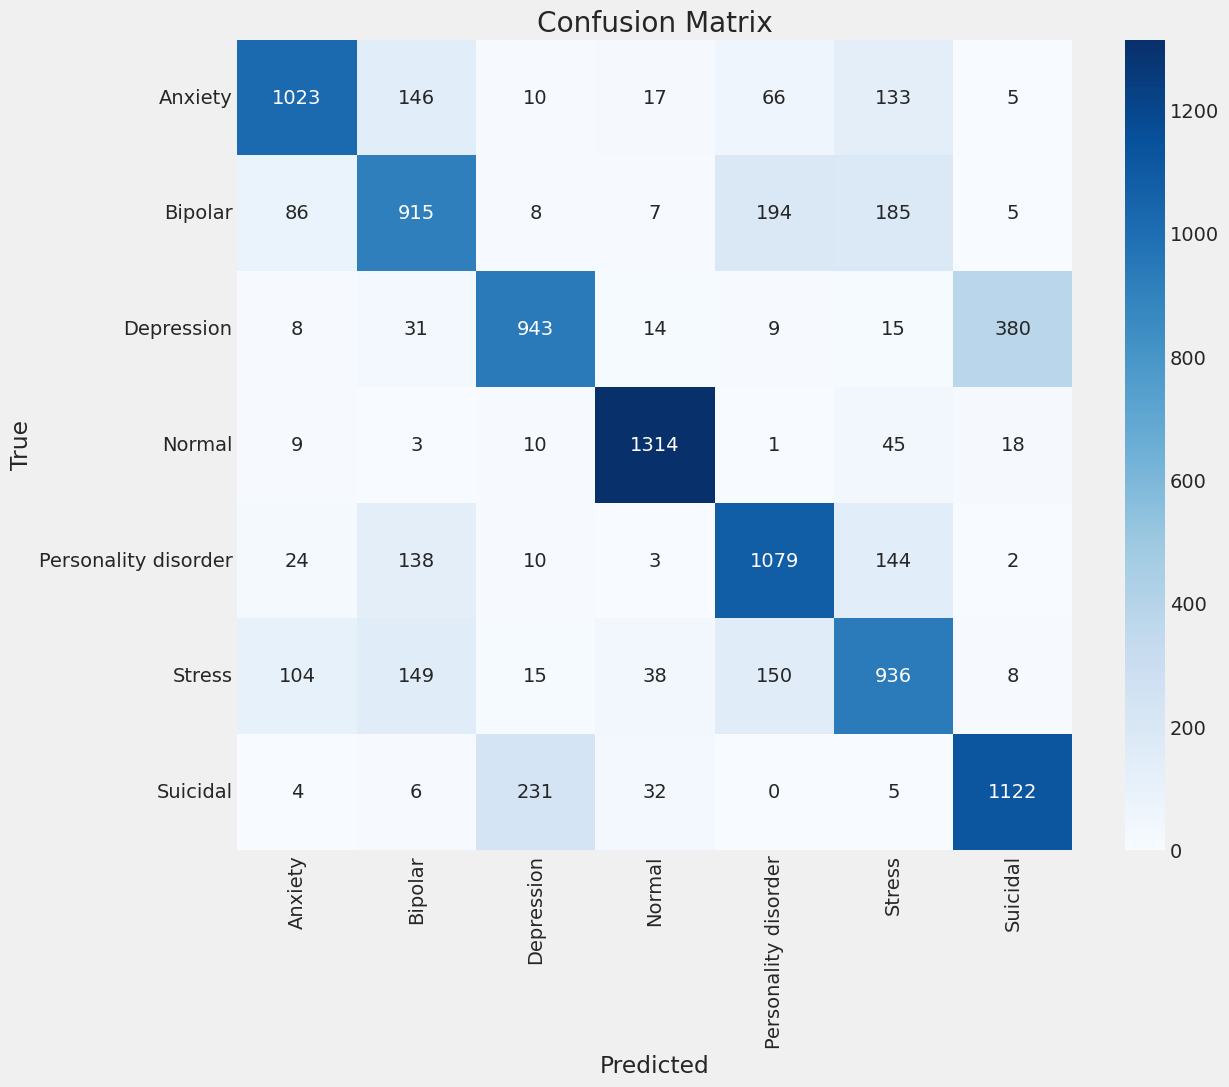

In [33]:
# Confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [34]:
# ====================
# Save Model and Results
# ====================
print("\nSaving model and results...")
save_dir = "/content/drive/MyDrive/Thesis Work/Models/Enhanced_MentalBERT"
os.makedirs(save_dir, exist_ok=True)

# Save model
model.save(os.path.join(save_dir, 'enhanced_mentalbert_model.keras'))
print(f"Model saved to {save_dir}")

# Save training history
history_df = pd.DataFrame(history.history)
history_df.to_csv(os.path.join(save_dir, 'training_history.csv'), index=False)

# Save classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv(os.path.join(save_dir, 'classification_report.csv'))

# Save confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
cm_df.to_csv(os.path.join(save_dir, 'confusion_matrix.csv'))

# Save label encoder and scaler
np.save(os.path.join(save_dir, 'class_names.npy'), class_names)
import joblib
joblib.dump(scaler, os.path.join(save_dir, 'feature_scaler.save'))
joblib.dump(ohe, os.path.join(save_dir, 'label_encoder.save'))

# Save selected features
with open(os.path.join(save_dir, 'selected_features.txt'), 'w') as f:
    f.write('\n'.join(selected_features))

print("\nAll results saved successfully!")


Saving model and results...


NotImplementedError: 
Object MentalBERTLayer was created by passing
non-serializable argument values in `__init__()`,
and therefore the object must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config

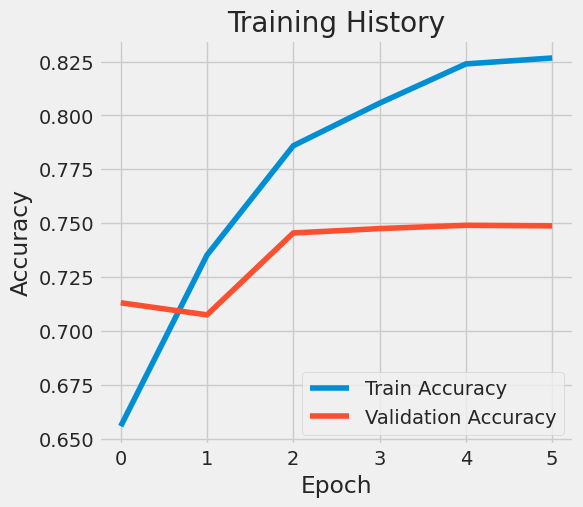

In [35]:
# ====================
# Visualize Training History
# ====================
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

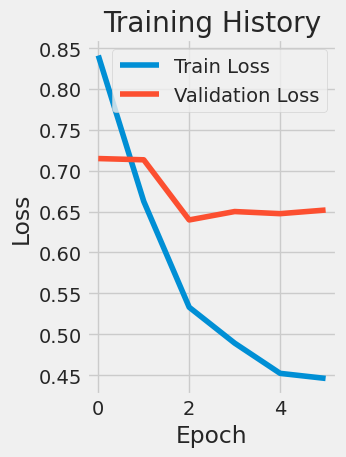


Training and evaluation complete!


In [36]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'training_history.png'))
plt.show()

print("\nTraining and evaluation complete!")